# 📊Smart Economy / - GDP per Capita Prediction

This notebook aims to perform an Exploratory Data Analysis (EDA) on the global development indicators dataset. The ultimate goal is to build a regression model to predict the **Gross Domestic Product per Capita (`gdp_per_capita`)** based on socioeconomic, demographic, and development-related features.

---

## 🔍 Contents

1. **Importing Libraries**
2. **Loading and Exploring the Dataset**
3. **Data Cleaning and Imputation**
4. **Categorical Variable Encoding**
5. **Univariate Analysis**
6. **Bivariate Analysis**
7. **Data Preparation for Modeling**

---

📌 *Note:* This EDA will help identify the most relevant variables, understand their distribution, and examine their relationships with the target variable.





[Used Dataset](https://www.kaggle.com/datasets/michaelmatta0/global-development-indicators-2000-2020)




[Github Repository](https://github.com/YeisonGiraldo1/Smart_Economy_IA)


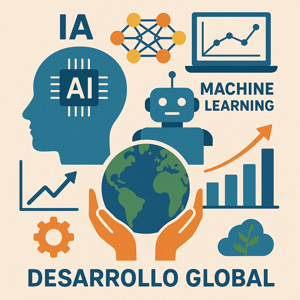





***PYTHON LIBRARIES***

***Python libraries, also known as modules, are predefined sets of code that extend the basic functionality of the language.***


In [ ]:
# IMPORT THE NECESSARY LIBRARIES

# --- DATA ANALYSIS ---
import pandas as pd  # Library for data manipulation and analysis (handling DataFrames and CSVs)
import numpy as np  # Library for numerical computing, used for working with arrays, statistics, etc.

# --- CHARTS AND VISUALIZATION ---
import matplotlib.pyplot as plt  # Library for creating static, animated, and interactive plots
import seaborn as sns  # Library for statistical data visualization, built on top of matplotlib

# --- MACHINE LEARNING PREPROCESSING ---
from sklearn.preprocessing import StandardScaler, LabelEncoder  # For feature scaling and encoding categorical variables
from sklearn.preprocessing import MinMaxScaler  # Scales numerical features to a specific range (commonly 0 to 1)

# --- MACHINE LEARNING ALGORITHMS ---
from sklearn.linear_model import LinearRegression  # Linear regression algorithm for predicting continuous values
from sklearn.ensemble import RandomForestRegressor  # Ensemble algorithm based on decision trees (Random Forest)

# --- MODEL TRAINING AND EVALUATION ---
from sklearn.model_selection import train_test_split  # To split the dataset into training and testing sets
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Metrics for evaluating regression models

# --- ADVANCED VISUALIZATION ---
import plotly.graph_objects as go  # For building interactive visualizations (customizable and dynamic)
import plotly.express as px  # Simplified interface for creating Plotly charts quickly
from yellowbrick.regressor import PredictionError  # Tool to visualize prediction error of regression models

# --- STATISTICS ---
import scipy.stats as stats  # For statistical functions (e.g., normality tests, correlations, etc.)

# --- XGBOOST ---
from xgboost import XGBRegressor  # Extreme Gradient Boosting algorithm (high-performance regression model)
from sklearn.model_selection import train_test_split  # (already imported above) - split data for training/testing
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error  # (already imported above) - evaluation metrics


In [ ]:
#import de dataset the main dataset
main_database = pd.read_csv("/content/database/Global_Development_Indicators_2000_2020.csv") #file path

In [ ]:
#Show the first five rows
main_database.head(5)

In [ ]:
# Show 5 rows randomly
main_database.sample(5)

In [ ]:
#Dataset dimension
main_database.shape

In [ ]:
#Columns name
main_database.columns.tolist()

In [ ]:
#Get general information about the dataset
main_database.info()

In [ ]:
#Getdescriptive statistics
main_database.describe()

In [ ]:
#validate how many null values ​​the dataset has
main_database.isnull().sum().sort_values(ascending=True)


In [ ]:
#Number of variables by data type
main_database.dtypes.value_counts()


In [ ]:
#View numeric columns
numeric_cols = main_database.select_dtypes(include=np.number).columns
print("Numeric columns:", numeric_cols.tolist())

In [ ]:
#View categorical columns
categorical_cols = main_database.select_dtypes(include='object').columns
print("Categorical columns:", categorical_cols.tolist())

In [ ]:
# Ver valores únicos en columnas categóricas
for col in categorical_cols:
    print(f"\n{col} - Unique values:")
    print(main_database[col].unique())

PREPROCESAMIENTO DE DATOS

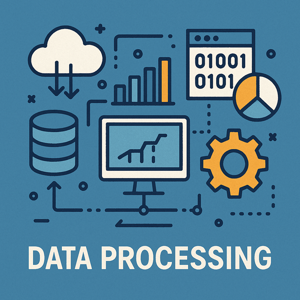



***IMPUTATION AND CODING OF FEATURES***

***Feature Imputation: The process of filling in missing values in a dataset's features (variables) using techniques like mean, median, mode, or more advanced methods like regression or machine learning models, to ensure complete data for analysis or modeling.***

***Feature Encoding: The process of converting categorical or non-numeric features into a numerical format suitable for machine learning algorithms, using techniques like one-hot encoding, label encoding, or ordinal encoding.***

In [ ]:
# DATA IMPUTATION AND ENCODING

'''
Data imputation in machine learning is the process of replacing missing values in a dataset with substituted values.
This code handles both categorical and numerical imputations, and encodes categorical variables.
'''

# Make a copy of the original dataset
main_database_copy = main_database.copy()


# ------------------------------------------------------------------------------
# IMPUTE CATEGORICAL COLUMNS (ONLY region AND income_group)

# Check number of unique categories (for informational purposes)
region_unique_count = main_database_copy['region'].nunique()
income_group_unique_count = main_database_copy['income_group'].nunique()


print("Unique categories in 'region':", region_unique_count)
print("Unique categories in 'income_group':", income_group_unique_count)


# Step 1: Impute missing values with the mode (most frequent value)
main_database_copy['region'] = main_database_copy['region'].fillna(main_database_copy['region'].mode()[0])
main_database_copy['income_group'] = main_database_copy['income_group'].fillna(main_database_copy['income_group'].mode()[0])


# Step 2: Convert to category type
categorical_columns = ['region', 'income_group']
for col in categorical_columns:
    main_database_copy[col] = main_database_copy[col].astype('category')


# Step 3: One-Hot Encoding (without dropping first category)
data_encoded = pd.get_dummies(main_database_copy, columns=categorical_columns, drop_first=False)


# Step 4: Convert new One-Hot columns to integers (0/1)
encoded_columns = data_encoded.columns.difference(main_database.columns)
data_encoded[encoded_columns] = data_encoded[encoded_columns].astype(int)


# Step 5: Check for remaining nulls
print("Null values after categorical processing:")
print(data_encoded.isnull().sum())


# ------------------------------------------------------------------------------
# IMPUTE NUMERIC VARIABLES


# Select only numeric columns
null_numeric_cols = data_encoded.select_dtypes(include=['number'])


# Verify which columns have null values
print("Nulls in numeric columns before imputation:")
print(null_numeric_cols.isnull().any())


# Step 6: Impute missing numeric values with the mean
for col in null_numeric_cols.columns:
    data_encoded[col] = data_encoded[col].fillna(data_encoded[col].mean())


# Final check for nulls
print("Total nulls in the final dataset:")
print(data_encoded.isnull().sum().sum())

# Optional: Save cleaned dataset to CSV
data_encoded.to_csv("data_encoded.csv", index=False)



In [ ]:
data_encoded.isnull().sum().sort_values(ascending=True)

CONCLUSIONES DE LA IMPUTACION Y CODIFICACION DE DATOS
No elegi la variable "currency_unit" para imputar datos ni codificar ya que crearia muchos features y haria mas grande el dataset y lento el proceso

In [ ]:
#describir variables numericas
data_encoded.describe().T[['mean', 'std', 'min', 'max']]


Conclusiones

***EXPLORATORY DATA ANALYSIS (EDA)***

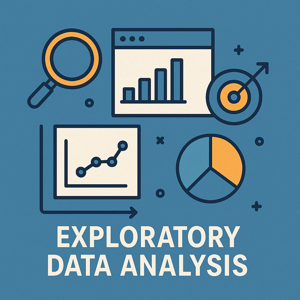


ANALISIS UNIVARIADO

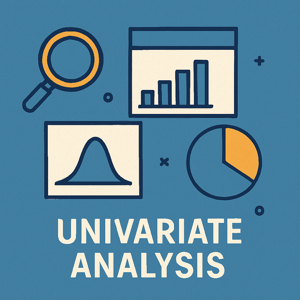



In [ ]:
#ANALISIS UNIVARIADO

#Histograma de algunas variables numericas (hisplot es similar a hist solo que son histogramas mas visuales)
columnas_interes = ['life_expectancy', 'school_enrollment_secondary', 'internet_usage_pct']
for col in columnas_interes:
    sns.histplot(data_encoded[col], kde=True)
    plt.title(f'Distribución de {col}')
    plt.show()





CONCLUSIONES
(LIFE_EXPECTANCY)


-Tiene sesgo a la izquierda mas paises con esperanza de vida alta.
-Pico Anomalo alrededor de los 70 años
-Prsencia de posibles outliers valores <50
-Moda visible en 70


CONCLUSIONES
(school_enrollment_secondary)


-Tiene 2 picos importantes uno cercano al 80% y uno cercano al 90%-100%
-pico anormal en 80%
-valores mayores al 100%
-Outliers a la izquierda (< 20%):




CONCLUSIONES
(INTERNET_USAGE_PT)
-Hay muchos paises con muy bajo uso de internet (0-20%)
-Pico pronunciado en 0 Más de 1000 registros tienen un uso de internet de 0%.
-tiene otro pico en 30% paises en desarrollo
-

In [ ]:
#Distribucion de la variable dependiente ["gdp_per_capita"]


sns.histplot(data_encoded['gdp_per_capita'], kde=True)
plt.title('Distribución del PIB per cápita')
plt.xlabel('PIB per cápita')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
# ------------------------------------------------------------
# Histogram of the 10 variables most correlated with GDP per Capita
# ------------------------------------------------------------

# Step 1: Compute correlation matrix for numeric columns
correlation_matrix = data_encoded.corr(numeric_only=True)

# Step 2: Get correlations with the target variable (gdp_per_capita), excluding itself
target_corr = correlation_matrix['gdp_per_capita'].drop('gdp_per_capita')

# Step 3: Select the top 10 most strongly correlated variables (absolute value)
important_features = target_corr.abs().sort_values(ascending=False).head(10)

# Step 4: Extract the names of those features
top_corr_columns = important_features.index

# Step 5: Plot histograms for each of the top correlated variables
plt.figure(figsize=(18, 20))  # Taller figure for better vertical spacing

# Loop through the top correlated columns and create subplots
for i, col in enumerate(top_corr_columns):
    plt.subplot(5, 2, i + 1)  # 5 rows, 2 columns layout (10 plots total)
    plt.hist(data_encoded[col], bins=20, edgecolor='black')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)

# Add a common title for all subplots
plt.suptitle("Top 10 Most Correlated Features with GDP per Capita", fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

In [ ]:
# Boxplots para visualizar outliers

plt.figure(figsize=(14, 6))
sns.boxplot(data=data_encoded[top_corr_columns], palette='Set3')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.title("Boxplots of the Top 10 Most Correlated Numeric Variables", fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
# ------------------------------------------------------------
# Boxplots of the Top 10 Most Correlated Variables with GDP per Capita
# ------------------------------------------------------------

# Step 1: Get top 10 most correlated numeric features (already done previously)
correlation_matrix = data_encoded.corr(numeric_only=True)
target_csorr = correlation_matrix['gdp_per_capita'].drop('gdp_per_capita')
important_features = target_corr.abs().sort_values(ascending=False).head(10)
top_corr_columns = important_features.index

# Step 2: Plot boxplots for each of the top correlated variables
plt.figure(figsize=(18, 25))  # Taller figure for vertical boxplots

# Loop through and create one boxplot per subplot
for i, col in enumerate(top_corr_columns):
    plt.subplot(5, 2, i + 1)  # 5 rows, 2 columns (same layout as histograms)
    sns.boxplot(data=data_encoded, x=col, color="skyblue")
    plt.title(f'Boxplot of {col}', fontsize=14)
    plt.xlabel(col)

# Add a global title
plt.suptitle("Boxplots of Top 10 Features Most Correlated with GDP per Capita", fontsize=20, y=1.02)
plt.tight_layout()
plt.show()




In [ ]:
data_encoded.describe().T[['mean', 'std', 'min', 'max']]


Conclusiones :

-La Frecuencia maxima del pip per capita ronda los 1400




In [ ]:
# KDE plot
plt.figure(figsize=(8, 5))
sns.kdeplot(data=data_encoded['gdp_per_capita'], fill=True, color='skyblue')
plt.title("KDE Plot of GDP per Capita")
plt.xlabel("GDP per Capita")
plt.grid(True)
plt.show()

In [ ]:
# Violin plot
plt.figure(figsize=(8, 5))
sns.violinplot(data=data_encoded['gdp_per_capita'], color='lightgreen')
plt.title("Violin Plot of GDP per Capita")
plt.xlabel("GDP per Capita")
plt.grid(True)
plt.show()

**CONCLUSIONES (Violin plot)**


**La forma verde (el "violín")**

-Representa una estimación de la densidad de la variable.

-Donde el gráfico es más ancho, hay más países con ese nivel de PIB per cápita.

-Donde es estrecho, hay pocos países.







**La línea negra central con caja (boxplot interno)**

-Caja negra: representa el rango intercuartílico (IQR): el 50% central de los datos.

-Línea dentro de la caja: es la mediana del PIB per cápita.

-Líneas horizontales (bigotes): muestran el rango de valores más comunes sin considerar los outliers.

-Puntos o líneas fuera: representan outliers (valores extremos).



**¿Qué podemos concluir del gráfico?**

-Hay muchos países con un PIB per cápita bajo, cerca del eje inferior. Esto se nota porque la parte inferior del violín es más ancha.

-La mediana está bastante baja, indicando que la mayoría de los países tienen PIB per cápita bajos.

-Hay una cola larga hacia valores altos (la parte fina que se estira hacia arriba), lo que muestra que algunos países tienen un PIB per cápita mucho más alto que el promedio → esto sugiere una distribución sesgada a la derecha (positiva)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#imprimir las variables categoricas

# Set a consistent style
sns.set(style="whitegrid")

# Function to create countplots for top N categories
def plot_top_categories(df, column, top_n=15):
    plt.figure(figsize=(12, 6))
    top_categories = df[column].value_counts().nlargest(top_n).index
    sns.countplot(data=df[df[column].isin(top_categories)], x=column, order=top_categories, palette='Set2')
    plt.title(f"Top {top_n} Most Common Categories in '{column}'", fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Apply function to desired categorical columns
plot_top_categories(main_database, 'region', top_n=15)
plot_top_categories(main_database, 'income_group', top_n=15)
plot_top_categories(main_database, 'currency_unit', top_n=15)


ANALISIS BIVARIADO



In [ ]:
#MATRIZ DE CORRELACION

# Step 1: Add the target variable to the selected top correlated columns
features_with_target = list(top_corr_columns) + ['gdp_per_capita']
top_corr_data_with_target = data_encoded[features_with_target]

# Step 2: Compute the correlation matrix
correlation_matrix_with_target = top_corr_data_with_target.corr()

# Step 3: Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix_with_target,
    annot=True,              # Show correlation values inside cells
    fmt=".2f",               # Two decimal places
    cmap='coolwarm',         # Color palette
    square=True,             # Square cells
    cbar_kws={"shrink": .8}  # Shrink colorbar
)

# Step 4: Add a title and show the plot
plt.title("Correlation Matrix: Top 10 Features + GDP per Capita", fontsize=16)
plt.tight_layout()
plt.show()



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar las variables más importantes + la variable objetivo
selected_features = list(top_corr_columns[:5]) + ['gdp_per_capita']

# Crear pairplot
sns.pairplot(data_encoded[selected_features])
plt.suptitle("Pairplot of Top Correlated Variables", y=1.02)
plt.show()


In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data=data_encoded, x="gdp_per_capita", kde=True, label="GDP per Capita", color="orange")
sns.histplot(data=data_encoded, x="gdp_usd", kde=True, label="GDP (Total USD)", color="blue")
plt.xlabel('GDP Value', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.title('Distribution of GDP per Capita vs Total GDP', fontsize=12)
plt.legend()
plt.show()


In [ ]:
plt.figure(figsize=(8, 5))

# Histplot for Life Expectancy
sns.histplot(data=data_encoded, x="life_expectancy", kde=True, label="Life Expectancy", color="green")

# Histplot for Child Mortality
sns.histplot(data=data_encoded, x="child_mortality", kde=True, label="Child Mortality", color="red")

plt.xlabel("Value", fontsize=10)
plt.ylabel("Frequency", fontsize=10)
plt.title("Life Expectancy vs Child Mortality", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#REGRESION

In [ ]:
# Crear la gráfica de regresión con dos colores
plt.figure(figsize=(10, 6))
scatter = sns.regplot(x='internet_usage_pct', y='gdp_per_capita', data=data_encoded,
                      ci=None,
                      scatter_kws={'color': 'blue', 'alpha': 0.6},  # Color para los puntos
                      line_kws={'color': 'red', 'linewidth': 2})   # Color para la línea de regresión

# Añadir títulos y etiquetas
plt.title('Relación entre el uso del Internet y Gdp per capita', fontsize=14)
plt.xlabel('Uso del internet', fontsize=12)
plt.ylabel('Gdo per capita', fontsize=12)

# Añadir leyenda
plt.legend(handles=[plt.Line2D([], [], color='blue', marker='o', linestyle='', label='Datos observados'),
                    plt.Line2D([], [], color='red', linewidth=2, label='Línea de regresión')])

plt.grid(True, alpha=0.3)
plt.show()

CONCLUSIONES

-**Relación positiva clara**
A medida que aumenta el uso del internet en un país, también tiende a aumentar el PIB per cápita. Esto sugiere una relación positiva entre la conectividad digital y el desarrollo económico.


**Alta dispersión en niveles bajos de uso**
Cuando el uso del internet es bajo (0–40%), el PIB per cápita varía mucho. Esto puede deberse a que hay países con bajo acceso a internet pero con economías fuertes por otros motivos (como recursos naturales o industrias específicas).

**Concentración de datos entre 50%–80% de uso**
La mayoría de los puntos está en ese rango, lo que indica que muchos países se encuentran en esa franja de adopción digital.




In [ ]:
#Calcular correlación
correlation_matrix = data_encoded.corr(numeric_only=True)

# Seleccionar correlaciones con gdp_per_capita
target_corr = correlation_matrix['gdp_per_capita'].drop('gdp_per_capita')

# Mostrar top 10 variables más correlacionadas (positiva o negativamente)
important_features = target_corr.abs().sort_values(ascending=False).head(15)
print("Top 15 correlated features with GDP per capita:")
print(important_features)

#-------------------------------------------------------------------------------

# # Calcular la correlación de cada variable con gdp_per_capita
# correlation = data_encoded.corr(numeric_only=True)['gdp_per_capita'].sort_values(ascending=False)

# # Mostrar las 10 más correlacionadas (positiva o negativamente)
# top_corr = correlation[1:11]  # Excluye el 1.0 del mismo target
# print(top_corr)

# # Opcional: visualizar
# plt.figure(figsize=(10, 5))
# top_corr.plot(kind='barh')
# plt.title('Top 10 variables correlacionadas con el PIB per cápita')
# plt.xlabel('Correlación')
# plt.grid(True)
# plt.show()


#------------------------------------------------------------------------------


# #Definir 'gdp_per_capita' como variable objetivo
# target = 'gdp_per_capita'

# # Elimina columnas no numéricas o irrelevantes
# drop_cols = ['country_name', 'country_code', 'year', 'calculated_gdp_per_capita','currency_unit']
# features = data_encoded.drop(columns=drop_cols + [target], errors='ignore')

# # Calcula la correlación con gdp_per_capita
# correlation = features.corrwith(data_encoded[target]).sort_values(ascending=False)

# # Visualiza las más correlacionadas
# plt.figure(figsize=(10, 6))
# sns.barplot(x=correlation.values[:20], y=correlation.index[:20])
# plt.title('Top 20 variables más correlacionadas con el PIB per cápita')
# plt.xlabel('Coeficiente de correlación')
# plt.ylabel('Variable')
# plt.tight_layout()
# plt.show()


In [ ]:
# selected_features = correlation[correlation.abs() > 0.4].index.tolist()


#LINEAR REGRESSION (EXPERIMENTO 1)

In [ ]:
# Dividir la variable caractersiticas elegida como independiente y la variable objetivo para correr el algoritmo de Linear Regresssion
X = data_encoded[["internet_usage_pct","econ_opportunity_index", "global_resilience_score","health_development_ratio", "global_development_resilience_index", "education_health_ratio", "income_group_High income", "life_expectancy", "digital_readiness_score","digital_connectivity_index" , "co2_emissions_per_capita_tons", "school_enrollment_secondary"]]
y = data_encoded['gdp_per_capita']


# X = data_encoded[selected_features]
# y = data_encoded['gdp_per_capita']


In [ ]:
# train_test_split -> Sirve para dividir los datos en conjuntos de entrenamiento y prueba de forma aleatoria.
from sklearn.model_selection import train_test_split


#La función train_test_split(X, y, ...) divide estos datos en cuatro variables:
# X_train	80% de X	Para entrenar el modelo
# X_test	20% de X	Para evaluar el modelo
# y_train	80% de y	Las etiquetas de X_train
# y_test	20% de y	Las etiquetas de X_test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Explicacion de Random State
# random_state fija la aleatoriedad en la división de datos.
# Permite obtener siempre la misma división al ejecutar el código.
# No tiene que ser 42, puedes usar cualquier número.
# Si no lo defines, cada vez que ejecutes el código, la división será diferente.








#-------------------------------------------------------------------------------

# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# import numpy as np

# # Separar datos
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Modelo
# model = LinearRegression()
# model.fit(X_train, y_train)

# # Predicciones
# y_pred_train = model.predict(X_train)
# y_pred_test = model.predict(X_test)

# # Evaluación
# print("R2 (train):", r2_score(y_train, y_pred_train))
# print("R2 (test):", r2_score(y_test, y_pred_test))
# print("MAE (test):", mean_absolute_error(y_test, y_pred_test))
# print("RMSE (test):", np.sqrt(mean_squared_error(y_test, y_pred_test)))


In [ ]:
# Mostrar el tamaño de los DataSets Resultantes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

In [ ]:
#Utilizo la libreria de SKLearn para hacer el llamado del algortimo en especifico que nos sirve para aplicar regresiones.
#aqui basicamente defino el modelo a utilizar para la regresion
model_simple_lin_reg = LinearRegression()

In [ ]:
# TIP TIP : Fit es el metodo que nos permite entrenar los datos que tenemos eligiendo previamente un model, notese que tomamos lo sets de entrenamiento
model_simple_lin_reg.fit(X_train, y_train)

In [ ]:
# TIP TIP : Predict, Hace Predecciones usando el set de prueba
y_train_pred = model_simple_lin_reg.predict(X_train) # Datos conocidos
y_pred = model_simple_lin_reg.predict(X_test) # Datos no conocidos

In [ ]:
plt.figure(figsize=(12, 7))

# Convertir a arrays numpy si no lo están ya
y_test_array = np.array(y_test).flatten()
y_pred_array = np.array(y_pred).flatten()

# Crear un rango de índices
index = np.arange(len(y_test_array))

# Graficar
plt.scatter(index, y_test_array, color='blue', alpha=0.7, label='Valores Reales (y_test)', s=60)
plt.scatter(index, y_pred_array, color='red', alpha=0.7, label='Valores Predichos (y_pred)', s=60)

# Conectar los puntos
for i in range(len(y_test_array)):
    plt.plot([index[i], index[i]], [y_test_array[i], y_pred_array[i]], 'gray', alpha=0.3)

# Personalización
plt.title('Comparación de Valores Reales y Predichos', fontsize=16)
plt.xlabel('Índice de Observaciones')
plt.ylabel('Valor')
plt.legend()
plt.grid(True, alpha=0.2)

plt.tight_layout()
plt.show()

#CONCLUSIONES

**Lo que muestra la gráfica:
Puntos azules: valores reales de gdp_per_capita (los que queremos predecir).**

Puntos rojos: valores predichos por el modelo.

Líneas grises: diferencias entre lo real y lo predicho (error).



**El modelo captura la tendencia general, pero falla en los valores extremos:**

Para valores bajos y medios de PIB per cápita, el modelo parece estar más cerca de los valores reales.

Pero para valores muy altos (outliers), el modelo predice mucho menos de lo que debería → no logra captar bien los valores extremos.

In [ ]:
my_dict = {"Actual": y_test, "pred": y_pred, "residual": y_test - y_pred}
compare = pd.DataFrame(my_dict)
compare

In [ ]:
# Exportar el DataFrame a un archivo CSV
compare.to_csv('comparacion_predicciones.csv', index=False)

In [ ]:
#EVALUAR EL MODELO CON METRICAS DE PERFORMANCE

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, i):

    scores = {
    i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},

    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}
    }

    return pd.DataFrame(scores)

In [ ]:
slr_score = train_val(y_train, y_train_pred, y_test, y_pred, 'linear')
slr_score

**R²**
El modelo explica ~60.7% de la varianza. No es malo, pero tampoco muy bueno. Idealmente querrías > 0.8. La cercanía entre ambos valores muestra que no hay sobreajuste.

**MAE**
En promedio, el error absoluto entre predicho y real es ~7.1 mil USD. Para países pobres, este error puede ser muy grande proporcionalmente.

**MSE**
Penaliza fuertemente los errores grandes. Es alto debido a outliers como los países ricos con valores muy elevados de PIB per cápita.

**RMSE**
Similar interpretación al MAE, pero más sensible a outliers. Es alto en términos absolutos.

In [ ]:
from yellowbrick.regressor import PredictionError

model = LinearRegression()

visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Mostrar los datos de prueba
visualizer.score(X_test, y_test)  # Evaluar el modelo en estos datos de prueba
visualizer.show()                 # Mostrar la gráfica





# gráfica de error de predicción (Prediction Error Plot)

Es una gráfica de dispersión donde:

Eje X (y): valores reales del conjunto de prueba (y_test).

Eje Y (ŷ): valores predichos por tu modelo (y_pred).



**Líneas importantes en la gráfica:**
Línea gris clara ("identity"): es la línea ideal donde ŷ = y (es decir, la predicción es exactamente igual al valor real). Si todos los puntos estuvieran sobre esta línea, el modelo sería perfecto.

Línea negra discontinua ("best fit"): es la recta de regresión ajustada a los puntos predichos vs reales. Si está muy separada de la línea de identidad, tu modelo está sesgado o tiene errores sistemáticos.



**Qué te dice esta gráfica?**
**-R² = 0.607:**

Esto significa que tu modelo explica el 60.7% de la varianza de los datos.

No es malo, pero tampoco excelente. Hay margen para mejorar.



**-Predicciones sesgadas:**

Como puedes ver, muchos puntos están por debajo de la línea de identidad, especialmente para valores reales altos.

Esto significa que tu modelo tiende a subestimar el PIB per cápita para los países ricos o valores altos.


**Presencia de valores negativos predichos:**

Hay puntos donde el valor predicho es menor que cero, lo cual es ilógico para el PIB per cápita. Esto es una limitación importante de LinearRegression.

In [ ]:
#SE AGREGA (NUEVO)


# 6. Plot Residuals vs Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='purple', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted GDP per Capita")
plt.ylabel("Residual")
plt.title("Residuals vs Predicted Values (Linear Regression)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

#RANDOM FOREST REGRESSION 1.0

In [ ]:
# Split the data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [ ]:
# Create the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)


In [ ]:
# Predict on training and test data
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)


In [ ]:
# Define metrics
def evaluate_model(y_true, y_pred, label):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f"\n{label} Metrics:")
    print(f"R2:   {r2:.4f}")
    print(f"MAE:  {mae:.2f}")
    print(f"MSE:  {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")

# Evaluate train and test
evaluate_model(y_train, y_train_pred, "Train")
evaluate_model(y_test, y_test_pred, "Test")




#RANDOM FOREST REGRESSION 2.0

In [ ]:
# Ver la relación entre las caracteristicas independientes y la variable objetivo (dependiente)
independent_variables = ['internet_usage_pct","econ_opportunity_index", "global_resilience_score","health_development_ratio", "global_development_resilience_index", "education_health_ratio", "income_group_High income", "life_expectancy", "digital_readiness_score","digital_connectivity_index" , "co2_emissions_per_capita_tons", "school_enrollment_secondary']
target_variable = 'gdp_per_capita'



In [ ]:
#DIVIDIR
X = data_encoded[["internet_usage_pct","econ_opportunity_index", "global_resilience_score","health_development_ratio", "global_development_resilience_index", "education_health_ratio", "income_group_High income", "life_expectancy", "digital_readiness_score","digital_connectivity_index" , "co2_emissions_per_capita_tons", "school_enrollment_secondary"]]
y = data_encoded['gdp_per_capita']

In [ ]:
# Dividir el set de datos de pruebas y el set de datos de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Crear y entrenar el modelo
rf_model = RandomForestRegressor(
    n_estimators=100,  # Número de árboles en el bosque
    random_state=42,    # Semilla para reproducibilidad
    max_depth=10,       # Profundidad máxima de los árboles
    min_samples_split=5 # Mínimo número de muestras para dividir un nodo
)

In [ ]:
rf_model .fit(X_train, y_train)

In [ ]:
# Predicciones
y_pred = rf_model .predict(X_test)
y_train_pred = rf_model .predict(X_train)

In [ ]:
# Se imprimen las predicciones del modelo y se empiezan analizar los residuos obtenidos
my_dict = {"Actual": y_test, "pred": y_pred, "residual": y_test - y_pred}
compare = pd.DataFrame(my_dict)
compare

In [ ]:
def train_val(y_train, y_train_pred, y_test, y_pred, i):

    scores = {
    i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},

    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}
    }

    return pd.DataFrame(scores)

In [ ]:
mlr_score = train_val(y_train, y_train_pred, y_test, y_pred, "multi")
mlr_score

✅ ¿Qué indican estas métricas?
📌 1. R² Score (Coeficiente de determinación)
Train (0.9858) y Test (0.9730) → Excelentes valores.

Esto significa que el modelo explica el 97.3% de la varianza del PIB per cápita en datos que nunca ha visto.

No hay una gran diferencia entre train y test, por lo tanto: no hay overfitting, y el modelo generaliza bien.


2. MAE y RMSE
Ambos errores son bajos considerando que estás prediciendo gdp_per_capita, que puede estar en decenas de miles.

La diferencia entre train y test es razonable.

El MAE Test de ~1,400 significa que, en promedio, el error por predicción es de 1,400 dólares, lo cual es bastante bueno.

El RMSE Test también está bajo, lo que indica que no hay errores extremos descontrolados.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Asegurarse de que las predicciones y los valores reales estén en formato array
y_test_array = np.array(y_test).flatten()
y_pred_array = np.array(y_pred).flatten()

# Crear índice para el eje x
index = np.arange(len(y_test_array))

# Crear la figura
plt.figure(figsize=(12, 7))

# Graficar puntos reales y predichos
plt.scatter(index, y_test_array, color='blue', alpha=0.7, label='Actual values (y_test)', s=60)
plt.scatter(index, y_pred_array, color='red', alpha=0.7, label='Predicted values (y_pred)', s=60)

# Dibujar líneas entre valores reales y predichos
for i in range(len(y_test_array)):
    plt.plot([index[i], index[i]], [y_test_array[i], y_pred_array[i]], color='gray', alpha=0.3)

# Añadir títulos y etiquetas
plt.title('Comparison of Actual and Predicted Values (Random Forest)', fontsize=16)
plt.xlabel('Observation Index')
plt.ylabel('GDP per Capita')
plt.legend()
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()


#VISUALIZAR ERRORES RESIDUALES

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

residuals = y_test - y_pred

plt.figure(figsize=(10,6))
sns.histplot(residuals, bins=30, kde=True, color='teal')
plt.axvline(0, color='red', linestyle='--')
plt.title('Distribución de los errores residuales (Random Forest)')
plt.xlabel('Error Residual')
plt.ylabel('Frecuencia')
plt.show()


In [ ]:
# graficar los residuales vs los valores predichos para ver si hay patrones:

plt.figure(figsize=(10,6))
plt.scatter(y_pred, residuals, alpha=0.6, color='purple')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted GDP per Capita')
plt.ylabel('Residual')
plt.grid(True, alpha=0.3)
plt.show()





In [ ]:
# Obtener importancias
importances = rf_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Graficar
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(15), palette='viridis')
plt.title('Top 15 Feature Importances (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [ ]:
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals (Random Forest)")
plt.show()


In [ ]:
#SE AGREGA (NUEVO)


model = RandomForestRegressor()

visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Mostrar los datos de prueba
visualizer.score(X_test, y_test)  # Evaluar el modelo en estos datos de prueba
visualizer.show()                 # Mostrar la gráfica

#Gradient Boosting Regressor

In [ ]:
X = data_encoded[["internet_usage_pct","econ_opportunity_index", "global_resilience_score","health_development_ratio", "global_development_resilience_index", "education_health_ratio", "income_group_High income", "life_expectancy", "digital_readiness_score","digital_connectivity_index" , "co2_emissions_per_capita_tons", "school_enrollment_secondary"]]
y = data_encoded['gdp_per_capita']

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Crear el modelo
gbr_model = GradientBoostingRegressor(
    n_estimators=100,       # Número de árboles
    learning_rate=0.1,      # Tasa de aprendizaje (más baja = más precisión pero más lento)
    max_depth=4,            # Profundidad máxima de cada árbol
    random_state=42
)


In [ ]:
# Entrenar el modelo
gbr_model.fit(X_train, y_train)

In [ ]:
# Predicciones
y_pred = gbr_model.predict(X_test)
y_train_pred = gbr_model.predict(X_train)

In [ ]:
# Métricas
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_pred)

In [ ]:
mae_test = mean_absolute_error(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = np.sqrt(mse_test)

In [ ]:
# Mostrar resultados
print("GradientBoostingRegressor Results:")
print(f"R² train: {r2_train:.4f}")
print(f"R² test:  {r2_test:.4f}")
print(f"MAE:      {mae_test:.2f}")
print(f"MSE:      {mse_test:.2f}")
print(f"RMSE:     {rmse_test:.2f}")

#XGBOST

In [ ]:
# 2. Definir X (features) e y (target)
X = data_encoded[[
    "internet_usage_pct", "econ_opportunity_index", "global_resilience_score",
    "health_development_ratio", "global_development_resilience_index",
    "education_health_ratio", "income_group_High income", "life_expectancy",
    "digital_readiness_score", "digital_connectivity_index",
    "co2_emissions_per_capita_tons", "school_enrollment_secondary"
]]


y = data_encoded['gdp_per_capita']

In [ ]:
# 3. Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [ ]:
# 4. Inicializar y entrenar el modelo
xgb_model = XGBRegressor(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42
)

In [ ]:
xgb_model.fit(X_train, y_train)

In [ ]:
# 5. Realizar predicciones
y_pred = xgb_model.predict(X_test)
y_train_pred = xgb_model.predict(X_train)

In [ ]:
# 6. Evaluar el modelo
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [ ]:
# 7. Mostrar métricas
print("🔍 XGBoost Performance Metrics:")
print(f"R² Train: {r2_train:.4f}")
print(f"R² Test:  {r2_test:.4f}")
print(f"MAE:      {mae:.2f}")
print(f"MSE:      {mse:.2f}")
print(f"RMSE:     {rmse:.2f}")

# Comparación de valores reales y predichos (XGBoost)

In [ ]:
# Asegúrate de tener las predicciones hechas antes de esto:
# y_pred = xgb_model.predict(X_test)

# Convertimos a arrays numpy
y_test_array = np.array(y_test).flatten()
y_pred_array = np.array(y_pred).flatten()

# Crear un rango de índices
index = np.arange(len(y_test_array))

# Graficar
plt.figure(figsize=(12, 7))
plt.scatter(index, y_test_array, color='blue', alpha=0.7, label='Valores Reales (y_test)', s=60)
plt.scatter(index, y_pred_array, color='red', alpha=0.7, label='Valores Predichos (y_pred)', s=60)

# Conectar los puntos con líneas grises
for i in range(len(y_test_array)):
    plt.plot([index[i], index[i]], [y_test_array[i], y_pred_array[i]], 'gray', alpha=0.3)

# Personalización del gráfico
plt.title('📊 Comparación de Valores Reales vs. Predichos (XGBoost)', fontsize=16)
plt.xlabel('Índice de Observaciones')
plt.ylabel('GDP per Capita')
plt.legend()
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb

# xgb_model = XGBRegressor()
# xgb_model.fit(X_train, y_train)

# Obtener importancias
importance = xgb_model.feature_importances_

# Crear DataFrame con nombres de las columnas
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importance
})

# Ordenar de mayor a menor
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Mostrar las más importantes
print(feature_importance_df.head(10))

plt.show()

In [ ]:
from xgboost import plot_importance

plt.figure(figsize=(10, 6))
plot_importance(xgb_model, max_num_features=10, importance_type='weight', height=0.6)
plt.title("Top 10 Features más importantes (XGBoost)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


#PREDICCION INDIVIDUAL

DESPUES DE SELECCIONAR EL MODELO QUE MEJOR PREDIJO EN ESTE CASO EL XGBOOST , HAREMOS UNAS PREDICIONES UNITARIAS , INSERTANDO LAS VARIABLES NOSOTROS MISMOS , ES DECIR VALOR POR VALOR

In [ ]:
#PREDICCION XGBOOST CON SOLO 6 VARIABLES
from xgboost import XGBRegressor

# Lista de variables seleccionadas
features = [
    'econ_opportunity_index',
    'global_development_resilience_index',
    'global_resilience_score',
    'internet_usage_pct',
    'co2_emissions_per_capita_tons',
    'life_expectancy'
]

# Definir X (features) e y (variable objetivo)
X = data_encoded[features]
y = data_encoded['gdp_per_capita']

# Dividir en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo
xgb_model6 = XGBRegressor()
xgb_model6.fit(X_train, y_train)






In [ ]:
def gdp_prediction(xgb_model,
                   econ_opportunity_index,
                   global_development_resilience_index,
                   global_resilience_score,
                   internet_usage_pct,
                   co2_emissions_per_capita_tons,
                   life_expectancy):
    """
    Predict GDP per capita given six feature values.

    Args:
        xgb_model:       El modelo XGBRegressor ya entrenado.
        econ_opportunity_index (float):                    Índice de oportunidad económica.
        global_development_resilience_index (float):       Índice global de resiliencia al desarrollo.
        global_resilience_score (float):                   Puntuación de resiliencia global.
        internet_usage_pct (float):                        Porcentaje de uso de internet.
        co2_emissions_per_capita_tons (float):             Emisiones de CO₂ per cápita (en toneladas).
        life_expectancy (float):                           Esperanza de vida.

    Returns:
        float: Predicción de PIB per cápita.
    """
    # Construimos la “instancia” con los valores en el mismo orden en que entrenamos:
    instancia = [[
        econ_opportunity_index,
        global_development_resilience_index,
        global_resilience_score,
        internet_usage_pct,
        co2_emissions_per_capita_tons,
        life_expectancy
    ]]

    # Devolvemos el primer elemento porque predict() regresa una lista de tamaño 1
    return xgb_model.predict(instancia)[0]






In [ ]:
prediccion = gdp_prediction(
    xgb_model6,
    econ_opportunity_index=5564097.86,
    global_development_resilience_index=4072936.60,
    global_resilience_score=0.3668,
    internet_usage_pct=2207532.99,
    co2_emissions_per_capita_tons=14690903.71,
    life_expectancy=72.945
)

print(f"Predicción de PIB per cápita: {prediccion:.2f}")


In [ ]:
prediccion = gdp_prediction(
    xgb_model6,
    econ_opportunity_index=-1,
    global_development_resilience_index=-1,
    global_resilience_score=-1,
    internet_usage_pct=-1,
    co2_emissions_per_capita_tons=-1,
    life_expectancy=-1
)

print(f"Predicción de PIB per cápita: {prediccion:.2f}")


In [ ]:
prediccion = gdp_prediction(
    xgb_model6,
    econ_opportunity_index=-1,
    global_development_resilience_index=-1,
    global_resilience_score=-1,
    internet_usage_pct=-1,
    co2_emissions_per_capita_tons=-1,
    life_expectancy=-1
)

print(f"Predicción de PIB per cápita: {prediccion:.2f}")

In [ ]:
# Ejemplo de entrada “plausible”:
pred = gdp_prediction(
    xgb_model6,
    econ_opportunity_index=5500,                 # Índice de oportunidad económica
    global_development_resilience_index=4000,    # Índice de resiliencia al desarrollo
    global_resilience_score=0.4,                 # Puntuación de resiliencia global
    internet_usage_pct=80,                       # 80% uso de internet
    co2_emissions_per_capita_tons=5,             # 5 toneladas de CO₂ per cápita
    life_expectancy=72                           # 72 años de esperanza de vida
)
print(f"Predicción de PIB per cápita (ejemplo): {pred:.2f} USD")


In [ ]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# import numpy as np

# # Predicciones
# y_pred_train = xgb_model.predict(X_train)
# y_pred_test = xgb_model.predict(X_test)

# # Métricas
# r2_train = r2_score(y_train, y_pred_train)
# r2_test = r2_score(y_test, y_pred_test)
# mae = mean_absolute_error(y_test, y_pred_test)
# mse = mean_squared_error(y_test, y_pred_test)
# rmse = np.sqrt(mse)

# print(f"R² Train: {r2_train:.4f}")
# print(f"R² Test:  {r2_test:.4f}")
# print(f"MAE:      {mae:.2f}")
# print(f"MSE:      {mse:.2f}")
# print(f"RMSE:     {rmse:.2f}")


#PREDICION INDIVIDUAL CON OTRAS VARIABLES

In [ ]:
#PREDICION INDIVIDUAL CON OTRAS A